# <font color='red'>Introduction to the Statistical Theory of Sampling</font>

The core idea behind statistical sampling is to learn about a large population by examining a well-chosen subset (sample). This approach is more efficient and cost-effective than a complete census, while still maintaining acceptable accuracy. By applying proper sampling techniques, we minimize bias and ensure that insights drawn from the sample generalize to the broader population.


## <font color='red'>Sampling and Initial Examples</font>

Sampling involves systematically selecting a subset of elements from a population to estimate its overall characteristics. For example, instead of polling every voter, a carefully chosen sample of voters can reveal public opinion. Proper selection methods ensure that each element of the population has a known, nonzero probability of selection.


In [4]:
import numpy as np

# Suppose we have a population represented as a large array
population = np.random.normal(loc=50, scale=10, size=100000)  # large population with mean 50 and std 10

# Draw a simple random sample
sample_size = 500
sample = np.random.choice(population, size=sample_size, replace=False)

# Compute sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

sample_mean, sample_std


(50.01360761176199, 10.475536105504085)

## <font color='red'>Sampling Surveys vs. Census Surveys</font>

- **Census Surveys:** Data is collected from every element in the population. While this can be comprehensive, it is often costly, time-consuming, and unnecessary.
  
- **Sampling Surveys:** Data is collected only from a well-chosen subset. This reduces cost and effort significantly, making it practical to achieve good precision without exhaustive data collection.


## Criteria for a Good Sample

1. **Representativeness:** The sample must reflect the population's diversity and structure.
2. **Randomization:** Elements should be chosen using a random mechanism to avoid selection bias.
3. **Appropriate Size:** The sample must be large enough for stable estimates, yet not so large that it wastes resources.


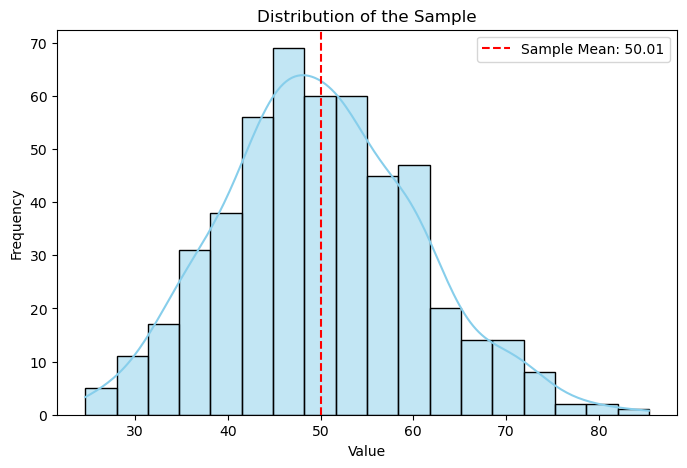

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(sample, kde=True, color='skyblue')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
plt.title("Distribution of the Sample")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## <font color='red'>Basic Notation and Concepts</font> 

- **Population Parameters (e.g., μ, σ²):** True values describing the entire population.
- **Sample Statistics (e.g., x̄, s²):** Estimates computed from the sample that serve as proxies for the corresponding population parameters.

The goal is to use sample statistics to infer the population parameters and quantify the uncertainty of these estimates.


## <font color='red'>Types of Sampling Designs</font>

1. **Simple Random Sampling (SRS):** Every element has an equal probability of selection.  
2. **Stratified Sampling:** Divide the population into strata and sample within each stratum. Improves precision when strata are homogeneous internally but differ between groups.  
3. **Cluster Sampling:** Select groups (clusters) at random, then sample all or a portion of units within them. Often used when population elements are naturally grouped (e.g., households).  
4. **Systematic Sampling:** Select elements at fixed intervals from an ordered list. Useful for operational convenience but requires checking assumptions about ordering.


In [14]:
# Simulate a population with two strata
stratum_A = np.random.normal(loc=40, scale=5, size=50000)  # Stratum A
stratum_B = np.random.normal(loc=60, scale=5, size=50000)  # Stratum B
population_stratified = np.concatenate([stratum_A, stratum_B])

# Let's assume we know the size of each stratum
size_A = len(stratum_A)
size_B = len(stratum_B)
N = size_A + size_B

# Determine sample sizes proportional to stratum size
n_total = 500
n_A = int(n_total * (size_A/N))
n_B = n_total - n_A

# Draw stratified samples
sample_A = np.random.choice(stratum_A, n_A, replace=False)
sample_B = np.random.choice(stratum_B, n_B, replace=False)
sample_stratified = np.concatenate([sample_A, sample_B])

# Compute stratified sample mean
mean_strat = np.mean(sample_stratified)
mean_strat


49.69065073781475

## <font color='red'>Estimation and Accuracy</font> 

- **Estimators:** Functions of the sample data used to estimate population parameters. Good estimators are unbiased, consistent, and efficient.
- **Sampling Distributions:** The probability distribution of a statistic over repeated sampling, guiding the construction of confidence intervals and hypothesis tests.
- **Standard Errors and Confidence Intervals:** Quantify the uncertainty around an estimate. For example, a 95% confidence interval suggests that, under repeated sampling, the true parameter would lie within that interval approximately 95% of the time.


In [19]:
from scipy.stats import norm

# Compute a 95% confidence interval for the sample mean (from previous sample_stratified)
xbar = mean_strat
s = np.std(sample_stratified, ddof=1)
n = len(sample_stratified)
alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)

ci_lower = xbar - z_crit * (s / np.sqrt(n))
ci_upper = xbar + z_crit * (s / np.sqrt(n))
(ci_lower, ci_upper)


(48.721379987841544, 50.659921487787955)

## <font color='red'>Trade-Offs and Practical Considerations</font> 

No single sampling method is universally best. Each design has trade-offs related to cost, complexity, and statistical efficiency. The choice depends on:

- The study's objectives.
- Available resources.
- Population characteristics.
- Operational constraints.

Successful sampling balances theoretical rigor with practical feasibility.


## <font color='green'>Exercise 1</font> 

Which of the following best describes the primary advantage of using a sample instead of a census?

A. It always produces more accurate estimates.  
B. It reduces cost and time while providing sufficiently accurate estimates.  
C. It guarantees unbiased results in all situations.  
D. It allows for analysis without any need to understand the population structure.


**Answer:** B

**Reasoning:**  
A sample is generally used to save time, money, and resources compared to a census. While it may not always be more accurate than a census (A), nor can it guarantee unbiased results in all cases (C), and it definitely still requires understanding of the population structure (D), the main advantage is cost and time efficiency while retaining acceptable levels of accuracy.




### <font color='green'>Exercise 2</font> 

In a simple random sample (SRS):

A. Each element of the population has the same known and nonzero probability of being selected.  
B. We divide the population into strata and sample proportionally from each.  
C. We select groups of elements (clusters) rather than individual elements.  
D. We select elements at regular intervals from a list.


**Answer:** A

**Reasoning:**  
A simple random sample ensures that each element in the population has an equal chance of selection, and each selection is independent. Stratified sampling (B), cluster sampling (C), and systematic sampling (D) differ from SRS in their design.


### <font color='green'>Exercise 3</font> 

Which of the following statements about confidence intervals is correct?

A. A 95% confidence interval means the true population mean is definitely inside the interval.  
B. Wider confidence intervals generally indicate less precision.  
C. Confidence intervals become narrower as sample size decreases.  
D. Confidence intervals are not affected by sample variability.


**Answer:** B

**Reasoning:**  
A 95% confidence interval does not guarantee that the true mean is inside (A); it indicates that if we repeated sampling many times, about 95% of those intervals would contain the true mean. Confidence intervals generally become narrower as sample size increases, not decreases (C). Confidence intervals are affected by sample variability (D). Therefore, the correct statement is that wider intervals generally indicate less precision.


### <font color='green'>Exercise 4</font> 

When we use stratified sampling, we:

A. Select each element of the population with equal probability.  
B. Select clusters of elements to measure completely.  
C. Partition the population into homogeneous groups and sample from each group.  
D. Select elements at fixed intervals from an ordered list.


**Answer:** C

**Reasoning:**  
Stratified sampling involves dividing the population into groups (strata) that are relatively homogeneous internally and then drawing samples from each stratum, often proportionally. Equal probability selection is associated with simple random sampling (A), cluster sampling involves selecting entire clusters (B), and systematic sampling involves selection at regular intervals (D).


### <font color='green'>Exercise 5</font> 

Which of the following best describes the trade-offs considered when choosing a sampling method?

A. Balancing cost, complexity, and accuracy.  
B. Always choosing the least expensive method regardless of accuracy.  
C. Prioritizing maximum accuracy at any cost.  
D. Using the method that was used previously without considering current objectives.


**Answer:** A

**Reasoning:**  
Choosing a sampling method involves weighing cost, available resources, complexity of implementation, and the desired level of accuracy. Simply choosing the cheapest option (B), maximizing accuracy no matter the cost (C), or sticking to tradition without considering current objectives (D) do not reflect this balanced approach.
